# Discoverability Testing - Channel Age (C) Groups Statistical Tests

In [61]:
# Dave Hunt
# University of Washington
# Nov 8, 2022

# This notebook runs regression analysis and statistical tests on the Dlist and Olist ranked lists produced to
# test Discoverability of toolstone sources surrounding the Old River Bed delta archaeological sites.

#  Discoverability/ 
#    │
#    ├──notebooks/
#    │   └── Discoverability Testing - A Groups statistical tests.ipynb
#    │   │
#    │   └── Discoverability Testing - C Groups statistical tests.ipynb
#    │
#    │──shapefiles/
#    │
#    └──Excel/
#
# Copyright (c) 2022, David Hunt
# All rights reserved.

# This source code is licensed under the BSD-style license found in the
# LICENSE file in the root directory of this source tree. 

This notebook is used to perform linear regression on the Channel Age groups Dlist and Olist data created in the associated Excel spreadsheet. In this notebook, simple linear regression is run on the Dlist and Olist data to ensure 
its statistical validity.  The results are then used to produce the %LL value for each group.  These %LL values are plotted over time to gauge landscape learning over the time of the Paleoindian occupation of the Old River Bed delta in Utah, USA

In [62]:
# included Python libraries
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols

from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import AutoMinorLocator
import matplotlib.ticker as ticker

import scipy as scipy
from scipy import stats

import numpy as np
import pandas as pd

In [63]:
# function that returns a line with equation mx+b 
def linear(x, m, b):
    return m*x + b

In [67]:
# The C group (C1 - C5) Dlists (expected rank orders)
c1_dlist = np.array([1,15,6,2,5,11,4,13,7,12,16,10,8,9,14,3])  # Black channel, same as D1
c2_dlist = np.array([2,15,6,3,5,11,4,13,7,12,16,9,8,10,14,1])  # Green channel
c3_dlist = np.array([1,15,6,3,5,11,4,13,7,12,16,10,8,9,14,2])  # Blue B channel
c4_dlist = np.array([3,15,6,2,5,11,4,13,7,12,16,9,8,10,14,1])  # Light Blue channel
c5_dlist = np.array([3,15,6,2,5,11,4,13,7,12,16,9,8,10,14,1])  # Lavender channel

# The C Group Olists (actual/observed artifact counts)
c1_olist = pd.Series([14,0,5,23,6,2,7,0,117,0,3,3,1,0,0,48])
c2_olist = pd.Series([0,0,2,11,0,1,1,0,20,0,0,2,1,0,1,30])
c3_olist = pd.Series([2,0,1,1,0,0,1,1,5,1,0,1,0,0,0,11])
c4_olist = pd.Series([1,1,2,8,2,0,1,0,38,0,0,2,0,1,1,21])
c5_olist = pd.Series([0,0,0,3,0,0,0,0,0,0,0,1,0,0,0,16])

In [68]:
c1_olist_rank = c1_olist.rank(ascending = False)
c2_olist_rank = c2_olist.rank(ascending = False)
c3_olist_rank = c3_olist.rank(ascending = False)
c4_olist_rank = c4_olist.rank(ascending = False)
c5_olist_rank = c5_olist.rank(ascending = False)

In [69]:
print(c2_olist_rank)

0     13.0
1     13.0
2      4.5
3      3.0
4     13.0
5      7.5
6      7.5
7     13.0
8      2.0
9     13.0
10    13.0
11     4.5
12     7.5
13    13.0
14     7.5
15     1.0
dtype: float64


In [70]:
# Compare the Dlist and Olist pair for each C group using Spearmans's rank-order correlation
c1_spearman_r, c1_spearman_r_pval = stats.spearmanr(c1_olist_rank, c1_dlist)
print("c1 Spearman's r:          ", str(round(c1_spearman_r, 5)))
print("c1 Spearman's r, p value: ", str(round(c1_spearman_r_pval, 4)))
c1_r2 = c1_spearman_r * c1_spearman_r
print("c1 Spearman's r2:         ", round(c1_r2, 5))
print("c1 %LL = ", round(1 - c1_r2,3) * 100)
print("--------------------------------")

c2_spearman_r, c2_spearman_r_pval = stats.spearmanr(c2_olist_rank, c2_dlist)
print("c2 Spearman's r:          ", str(round(c2_spearman_r, 5)))
print("c2 Spearman's r, p value: ", str(round(c2_spearman_r_pval, 3)))
c2_r2 = c2_spearman_r * c2_spearman_r
print("c2 Spearman's r2:         ", round(c2_r2, 5))
print("c2 %LL = ", round(1 - c2_r2,3) * 100)
print("--------------------------------")

c3_spearman_r, c3_spearman_r_pval = stats.spearmanr(c3_olist_rank, c3_dlist)
print("c3 Spearman's r:          ", str(round(c3_spearman_r, 5)))
print("c3 Spearman's r, p value: ", str(round(c3_spearman_r_pval, 3)))
c3_r2 = c3_spearman_r * c3_spearman_r
print("c3 Spearman's r2:         ", round(c3_r2, 5))
print("c3 %LL = ", round(1 - c3_r2,3) * 100)
print("--------------------------------")

c4_spearman_r, c4_spearman_r_pval = stats.spearmanr(c4_olist_rank, c4_dlist)
print("c4 Spearman's r:          ", str(round(c4_spearman_r, 5)))
print("c4 Spearman's r, p value: ", str(round(c4_spearman_r_pval, 3)))
c4_r2 = c4_spearman_r * c4_spearman_r
print("c4 Spearman's r2:         ", round(c4_r2, 5))
print("c4 %LL = ", round(1 - c4_r2,4) * 100)
print("--------------------------------")

c5_spearman_r, c5_spearman_r_pval = stats.spearmanr(c5_olist_rank, c5_dlist)
print("c5 Spearman's r:          ", str(round(c5_spearman_r, 5)))
print("c5 Spearman's r, p value: ", str(round(c5_spearman_r_pval, 3)))
c5_r2 = c5_spearman_r * c5_spearman_r
print("c5 Spearman's r2:         ", round(c5_r2, 5))
print("c5 %LL = ", round(1 - c5_r2,3) * 100)

c1 Spearman's r:           0.77679
c1 Spearman's r, p value:  0.0004
c1 Spearman's r2:          0.60341
c1 %LL =  39.7
--------------------------------
c2 Spearman's r:           0.50183
c2 Spearman's r, p value:  0.048
c2 Spearman's r2:          0.25184
c2 %LL =  74.8
--------------------------------
c3 Spearman's r:           0.59728
c3 Spearman's r, p value:  0.015
c3 Spearman's r2:          0.35675
c3 %LL =  64.3
--------------------------------
c4 Spearman's r:           0.64778
c4 Spearman's r, p value:  0.007
c4 Spearman's r2:          0.41962
c4 %LL =  58.040000000000006
--------------------------------
c5 Spearman's r:           0.50048
c5 Spearman's r, p value:  0.048
c5 Spearman's r2:          0.25048
c5 %LL =  75.0


In [71]:
# Form the lists into a Pandas dataframe

c1_dlist = np.array([1,15,6,2,5,11,4,13,7,12,16,10,8,9,14,3]).reshape((-1, 1))
c2_dlist = np.array([2,15,6,3,5,11,4,13,7,12,16,9,8,10,14,1]).reshape((-1, 1))
c3_dlist = np.array([1,15,6,3,5,11,4,13,7,12,16,10,8,9,14,2]).reshape((-1, 1))
c4_dlist = np.array([3,15,6,2,5,11,4,13,7,12,16,9,8,10,14,1]).reshape((-1, 1))
c5_dlist = np.array([3,15,6,2,5,11,4,13,7,12,16,9,8,10,14,1]).reshape((-1, 1))

c1_x = list(np.concatenate(c1_dlist).flat)
c2_x = list(np.concatenate(c2_dlist).flat)
c3_x = list(np.concatenate(c3_dlist).flat)
c4_x = list(np.concatenate(c4_dlist).flat)
c5_x = list(np.concatenate(c5_dlist).flat)

c1_y = c1_olist_rank.tolist()
c2_y = c2_olist_rank.tolist()
c3_y = c3_olist_rank.tolist()
c4_y = c4_olist_rank.tolist()
c5_y = c5_olist_rank.tolist()

#create dataset
C_df = pd.DataFrame({'c1_x': c1_x,
                     'c1_y': c1_y,
                     'c2_x': c2_x,
                     'c2_y': c2_y,
                     'c3_x': c3_x,
                     'c3_y': c3_y,                     
                     'c4_x': c4_x,
                     'c4_y': c4_y,                     
                     'c5_x': c5_x,
                     'c5_y': c5_y})
#view dataset
C_df

,c1_x,c1_y,c2_x,c2_y,c3_x,c3_y,c4_x,c4_y,c5_x,c5_y
0,1,4.0,2,13.0,1,3.0,3,9.0,3,10.0
1,15,14.0,15,13.0,15,13.0,15,9.0,15,10.0
2,6,7.0,6,4.5,6,6.5,6,5.0,6,10.0
3,2,3.0,3,3.0,3,6.5,2,3.0,2,2.0
4,5,6.0,5,13.0,5,13.0,5,5.0,5,10.0
5,11,10.0,11,7.5,11,13.0,11,14.0,11,10.0
6,4,5.0,4,7.5,4,6.5,4,9.0,4,10.0
7,13,14.0,13,13.0,13,6.5,13,14.0,13,10.0
8,7,1.0,7,2.0,7,2.0,7,1.0,7,10.0
9,12,14.0,12,13.0,12,6.5,12,14.0,12,10.0


## Plot each group

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


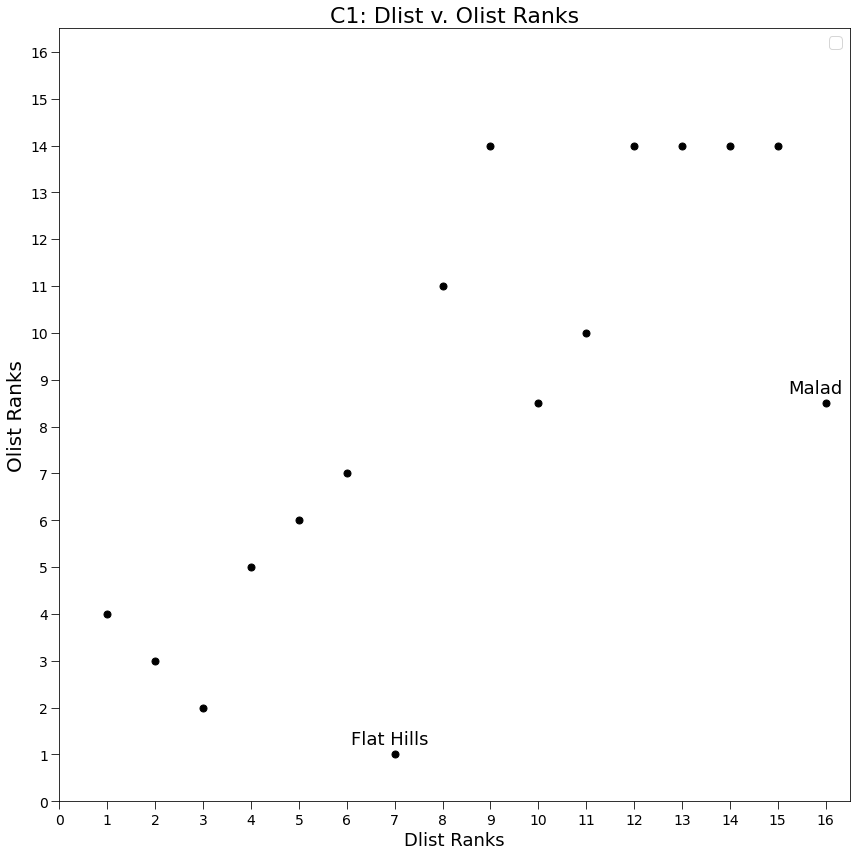

In [72]:
# C1 Dlist v Olist
# fits the data to a line and plots it
fig = plt.figure(figsize=(12,12))
gs = GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.plot(C_df.c1_x, C_df.c1_y, "ko", markersize=7)    

ax1.set_xlim(0,16.5)
ax1.set_ylim(0,16.5)

ax1.set_title("C1: Dlist v. Olist Ranks", fontsize=22)
ax1.set_xlabel("Dlist Ranks",  fontsize=18)
ax1.set_ylabel("Olist Ranks",  fontsize=20)
ax1.legend(loc='best', fontsize=16)

ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.tick_params(axis='both',which='major', direction="out", bottom="on", length=8, labelsize=14)
ax1.tick_params(axis='both',which='minor', direction="out", bottom="on", length=5, labelsize=14)

fig.tight_layout()

plt.annotate("Malad",               # this is the text
        (16,8.5),                   # these are the coordinates to position the label
        textcoords="offset points", # how to position the text
        size=18,
        xytext=(-10,10),            # distance from text to points (x,y)
        ha='center')                # horizontal alignment can be left, right or center    

plt.annotate("Flat Hills", 
        (7,1), 
        textcoords="offset points", 
        size=18,
        xytext=(-5,10), 
        ha='center') 
    
plt.savefig('C1 scatter plot book1 300dpi.jpg', dpi=300)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


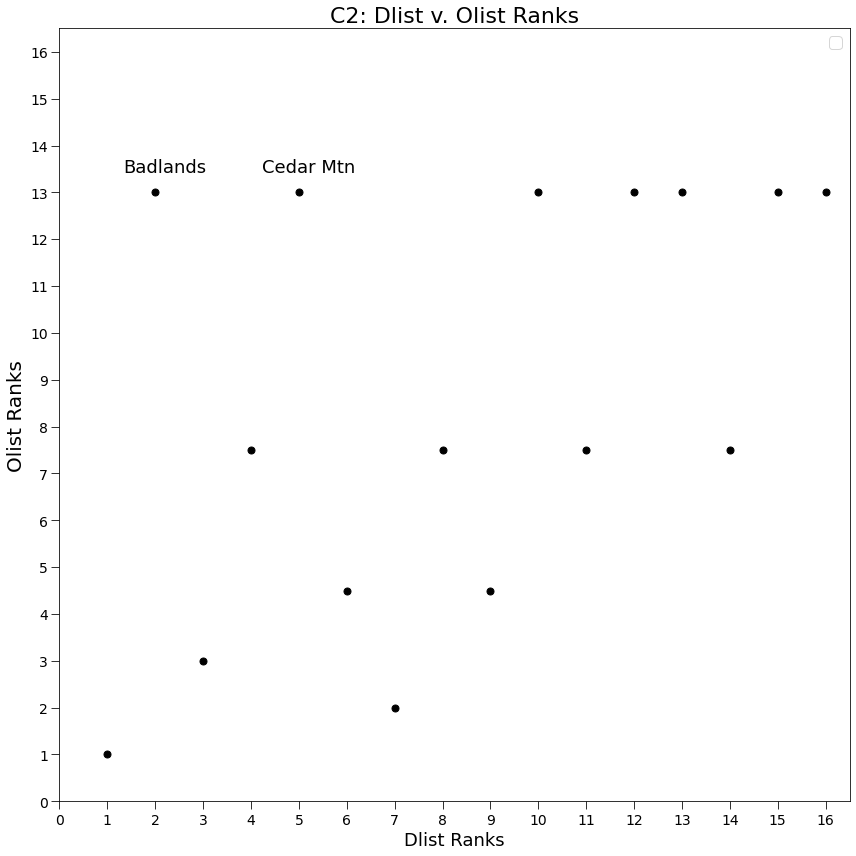

In [73]:
# C2 Dlist v Olist
# fits the data to a line and plots itfig = plt.figure(figsize=(12,12))
fig = plt.figure(figsize=(12,12))
gs = GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.plot(C_df.c2_x, C_df.c2_y, "ko", markersize=7)    

ax1.set_xlim(0,16.5)
ax1.set_ylim(0,16.5)

ax1.set_title("C2: Dlist v. Olist Ranks", fontsize=22)
ax1.set_xlabel("Dlist Ranks",  fontsize=18)
ax1.set_ylabel("Olist Ranks",  fontsize=20)
ax1.legend(loc='best', fontsize=16)

ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.tick_params(axis='both',which='major', direction="out", bottom="on", length=8, labelsize=14)
ax1.tick_params(axis='both',which='minor', direction="out", bottom="on", length=5, labelsize=14)

plt.annotate("Badlands", 
        (2,13),
        textcoords="offset points", 
        size=18,
        xytext=(10,20), 
        ha='center') 

plt.annotate("Cedar Mtn", 
        (5,13),
        textcoords="offset points", 
        size=18,
        xytext=(10,20), 
        ha='center') 

fig.tight_layout()
    
plt.savefig('C2 scatter plot book1 300dpi.jpg', dpi=300)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


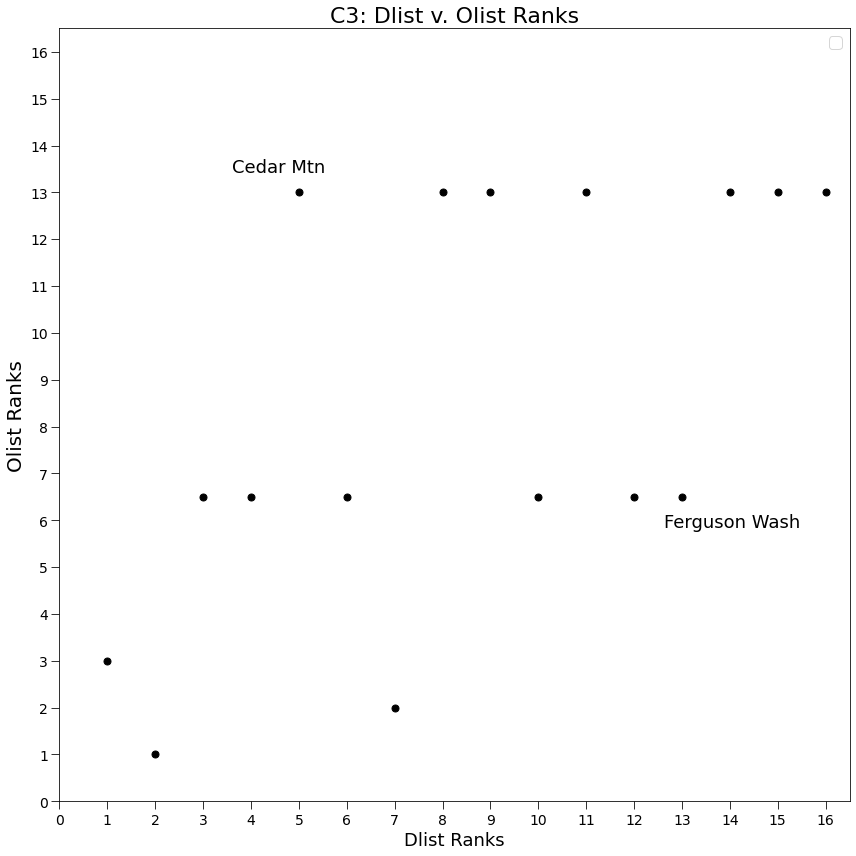

In [74]:
# C3 Dlist v Olist
# fits the data to a line and plots itfig = plt.figure(figsize=(12,12))
fig = plt.figure(figsize=(12,12))
gs = GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.plot(C_df.c3_x, C_df.c3_y, "ko", markersize=7)    

ax1.set_xlim(0,16.5)
ax1.set_ylim(0,16.5)

ax1.set_title("C3: Dlist v. Olist Ranks", fontsize=22)
ax1.set_xlabel("Dlist Ranks",  fontsize=18)
ax1.set_ylabel("Olist Ranks",  fontsize=20)
ax1.legend(loc='best', fontsize=16)

ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.tick_params(axis='both',which='major', direction="out", bottom="on", length=8, labelsize=14)
ax1.tick_params(axis='both',which='minor', direction="out", bottom="on", length=5, labelsize=14)

plt.annotate("Cedar Mtn", 
        (5,13),
        textcoords="offset points", 
        size=18,
        xytext=(-20,20), 
        ha='center') 

plt.annotate("Ferguson Wash", 
        (13,6.5),
        textcoords="offset points", 
        size=18,
        xytext=(50,-30), 
        ha='center') 

fig.tight_layout()  
plt.savefig('C3 scatter plot book1 300dpi.jpg', dpi=300)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


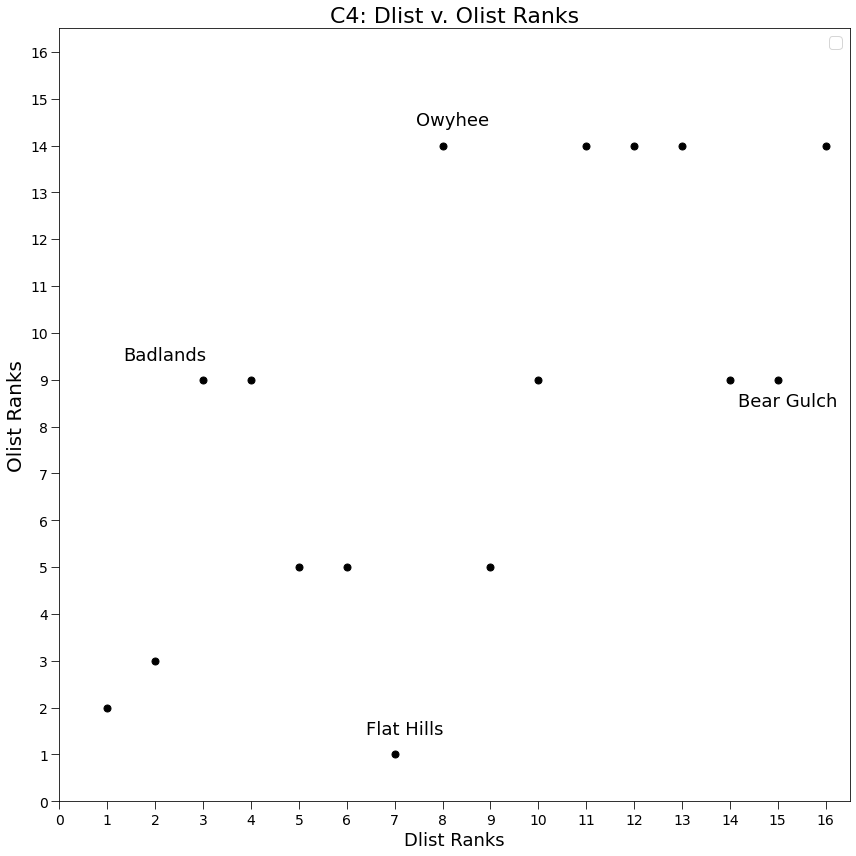

In [75]:
# C4 Dlist v Olist
# fits the data to a line and plots itfig = plt.figure(figsize=(12,12))
fig = plt.figure(figsize=(12,12))
gs = GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.plot(C_df.c4_x, C_df.c4_y, "ko", markersize=7)    

ax1.set_xlim(0,16.5)
ax1.set_ylim(0,16.5)

ax1.set_title("C4: Dlist v. Olist Ranks", fontsize=22)
ax1.set_xlabel("Dlist Ranks",  fontsize=18)
ax1.set_ylabel("Olist Ranks",  fontsize=20)
ax1.legend(loc='best', fontsize=16)

ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.tick_params(axis='both',which='major', direction="out", bottom="on", length=8, labelsize=14)
ax1.tick_params(axis='both',which='minor', direction="out", bottom="on", length=5, labelsize=14)

plt.annotate("Badlands", 
        (2,9),
        textcoords="offset points", 
        size=18,
        xytext=(10,20), 
        ha='center') 

plt.annotate("Bear Gulch", 
        (15,8),
        textcoords="offset points", 
        size=18,
        xytext=(10,20), 
        ha='center') 

plt.annotate("Flat Hills", 
        (7,1),
        textcoords="offset points", 
        size=18,
        xytext=(10,20), 
        ha='center') 

plt.annotate("Owyhee", 
        (8,14),
        textcoords="offset points", 
        size=18,
        xytext=(10,20), 
        ha='center') 




fig.tight_layout()  
plt.savefig('C4 scatter plot book1 300dpi.jpg', dpi=300)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


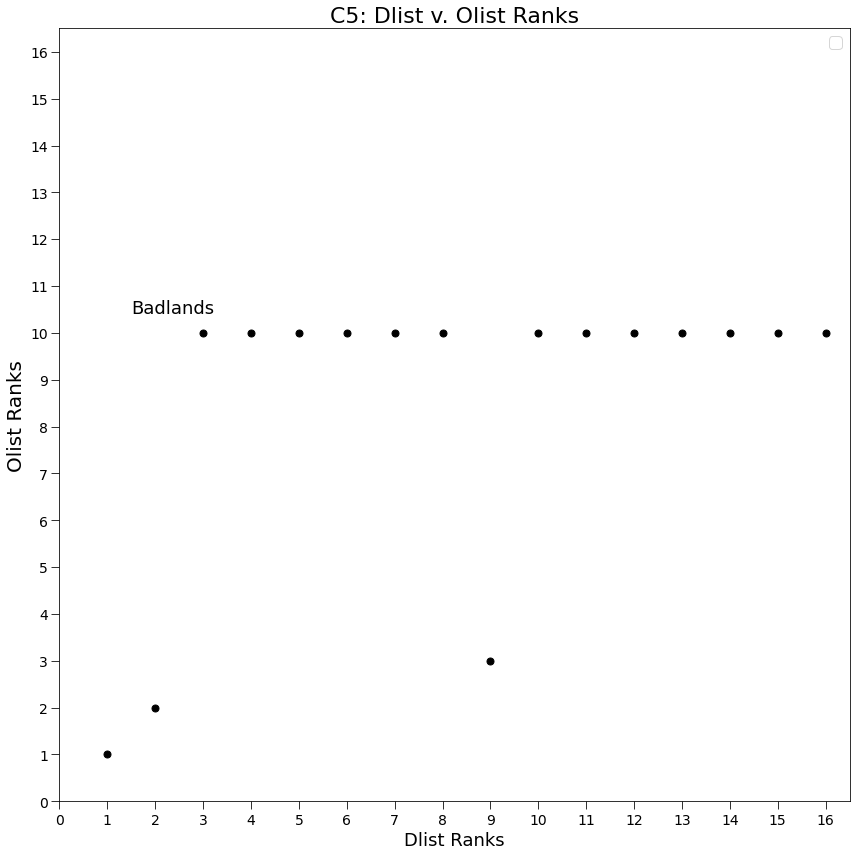

In [76]:
# C5 Dlist v Olist
# fits the data to a line and plots itfig = plt.figure(figsize=(12,12))
fig = plt.figure(figsize=(12,12))
gs = GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.plot(C_df.c5_x, C_df.c5_y, "ko", markersize=7)    

ax1.set_xlim(0,16.5)
ax1.set_ylim(0,16.5)

ax1.set_title("C5: Dlist v. Olist Ranks", fontsize=22)
ax1.set_xlabel("Dlist Ranks",  fontsize=18)
ax1.set_ylabel("Olist Ranks",  fontsize=20)
ax1.legend(loc='best', fontsize=16)

ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.tick_params(axis='both',which='major', direction="out", bottom="on", length=8, labelsize=14)
ax1.tick_params(axis='both',which='minor', direction="out", bottom="on", length=5, labelsize=14)

plt.annotate("Badlands", 
        (3,10),
        textcoords="offset points", 
        size=18,
        xytext=(-30,20), 
        ha='center') 

fig.tight_layout()  
plt.savefig('C5 scatter plot book1 300dpi.jpg', dpi=300)

## Plot the Landscape Learning results

%LL = (1 - r^2)   Calculations and group ages (radiocarbon) are described in my dissertation, Chapter 5

In [77]:
C_LL = [75, 58.0, 64.3, 74.8, 39.7]
C_dates = [9050, 9300, 9750, 10050, 10650]

#create dataset
Cgrp_df = pd.DataFrame({'C_LL': C_LL,
                        'C_dates': C_dates})
#view dataset
Cgrp_df

,C_LL,C_dates
0,75.0,9050
1,58.0,9300
2,64.3,9750
3,74.8,10050
4,39.7,10650


slope = -0.01 (+/-) 0.01
y-intercept = 206.72 (+/-) 100.28


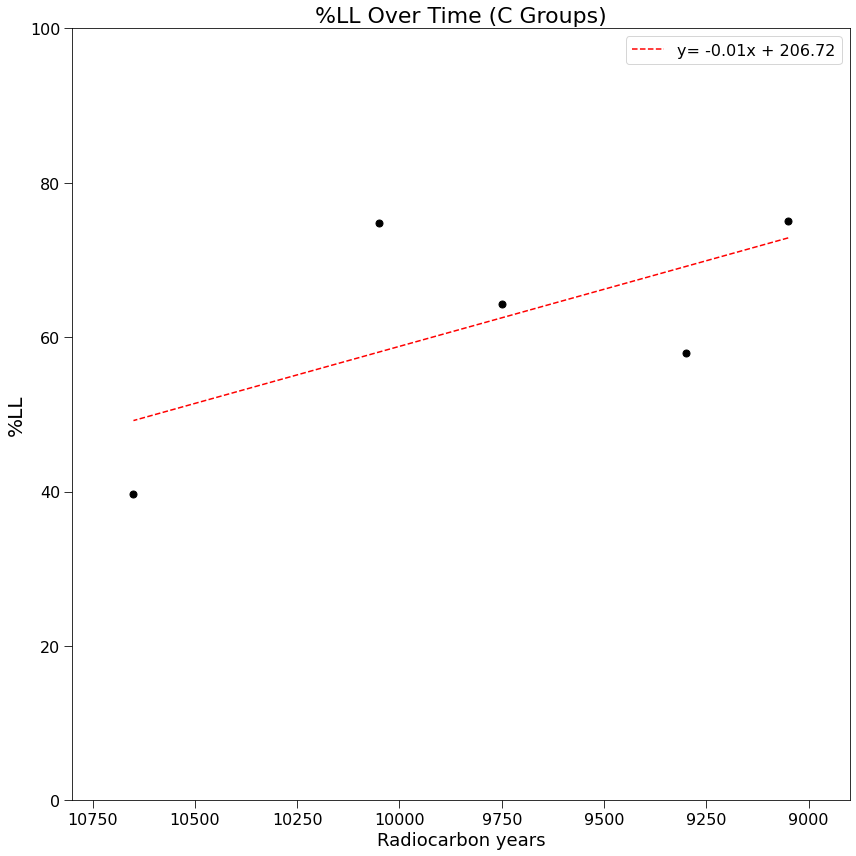

In [78]:
fig = plt.figure(figsize=(12,12))
gs = GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.plot(Cgrp_df.C_dates, Cgrp_df.C_LL, "ko", markersize=7)    

# popt_linear: this contains the fitting parameters
# pcov_linear: estimated covariance of the fitting paramters
popt_linear, pcov_linear = scipy.optimize.curve_fit(linear, Cgrp_df.C_dates, Cgrp_df.C_LL)
perr_linear = np.sqrt(np.diag(pcov_linear))
print ("slope = %0.2f (+/-) %0.2f" % (popt_linear[0], perr_linear[0]))
print( "y-intercept = %0.2f (+/-) %0.2f" %(popt_linear[1], perr_linear[1]))

ax1.plot(Cgrp_df.C_dates, linear(Cgrp_df.C_dates, *popt_linear), 'r--', label="y= %0.2fx + %0.2f" % (popt_linear[0], popt_linear[1]))

ax1.set_xlim(10800,8900)
ax1.set_ylim(0,100)

ax1.set_title("%LL Over Time (C Groups)", fontsize=22)
ax1.set_ylabel("%LL",  fontsize=20)
ax1.set_xlabel("Radiocarbon years",  fontsize=18)
ax1.legend(loc='best', fontsize=16)
ax1.tick_params(axis='both',which='major', direction="out", bottom="on", length=8, labelsize=16)
ax1.tick_params(axis='both',which='minor', direction="out", bottom="on", length=5, labelsize=16)
fig.tight_layout()
   
plt.savefig('C LL book1 300dpi.jpg', dpi=300)

In [79]:
C_pearson_r, C_pearson_r_pval = stats.pearsonr(C_LL, C_dates)
print("C Pearson's r:          ", str(round(C_pearson_r, 3)))
print("C Pearson's r, p value: ", str(round(C_pearson_r_pval, 4)))
print("--------------------------------")

C Pearson's r:           -0.64
C Pearson's r, p value:  0.245
--------------------------------


In [80]:
C_spearman_r, C_spearman_r_pval = stats.spearmanr(C_LL, C_dates)
print("C Spearman's r:          ", str(round(C_spearman_r, 3)))
print("C Spearman's r, p value: ", str(round(C_spearman_r_pval, 4)))

C Spearman's r:           -0.6
C Spearman's r, p value:  0.2848


In [81]:
#fit multiple linear regression model
C_model = ols('C_LL ~ C_dates', data=Cgrp_df).fit()

#view model summary
print(C_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   C_LL   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     2.080
Date:                Tue, 08 Nov 2022   Prob (F-statistic):              0.245
Time:                        22:00:49   Log-Likelihood:                -18.620
No. Observations:                   5   AIC:                             41.24
Df Residuals:                       3   BIC:                             40.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    206.7246    100.275      2.062      0.1

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


### Running the same regression and stats tests using calender years instead of radiocarbon years.

In [82]:
C_LL = [75, 58.0, 64.3, 74.8, 39.7]
Ccal_dates = [10221, 10444, 11167, 11578, 12674]
#create dataset
Ccal_df = pd.DataFrame({'C_LL': C_LL,
                     'Ccal_dates': Ccal_dates})
#view dataset
Ccal_df

,C_LL,Ccal_dates
0,75.0,10221
1,58.0,10444
2,64.3,11167
3,74.8,11578
4,39.7,12674


slope = -0.01 (+/-) 0.01
y-intercept = 172.75 (+/-) 72.45


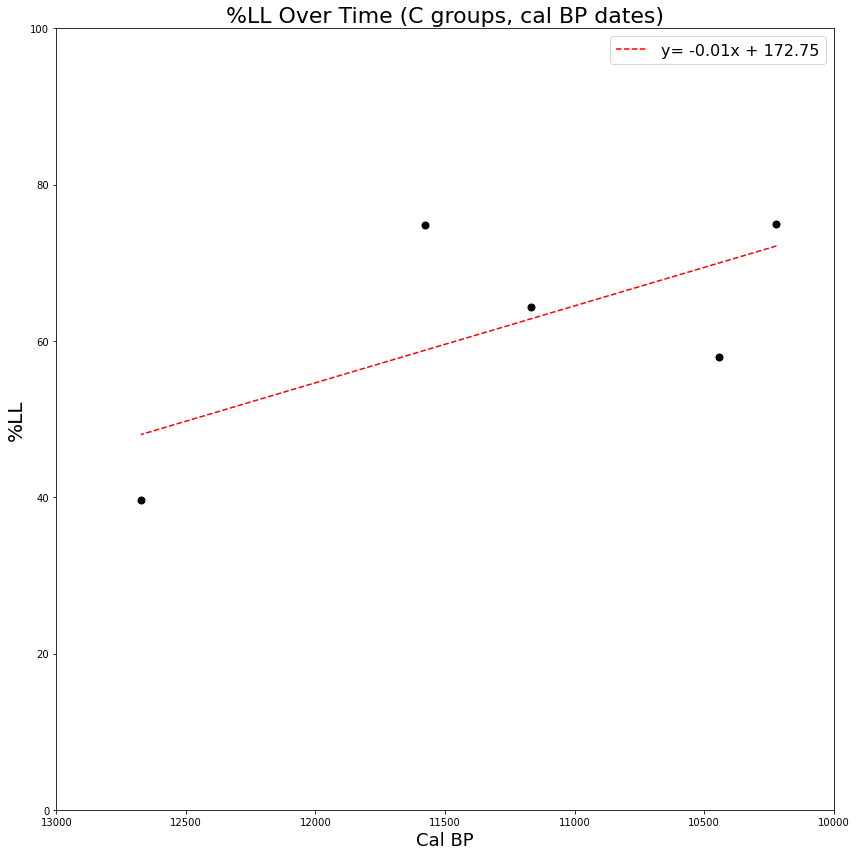

In [83]:
# fits the data to a line and plots it
# dist: x variables, independent, distance from Home to patch
# tally: y variables, dependent, tally of encounters with the patch during 100 walks
# label: patch name to title the graph and create the filename    

fig = plt.figure(figsize=(12,12))
gs = GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.plot(Ccal_df.Ccal_dates, Ccal_df.C_LL, "ko", markersize=7)    

# popt_linear: this contains the fitting parameters
# pcov_linear: estimated covariance of the fitting paramters
popt_linear, pcov_linear = scipy.optimize.curve_fit(linear, Ccal_df.Ccal_dates, Ccal_df.C_LL)
perr_linear = np.sqrt(np.diag(pcov_linear))
print ("slope = %0.2f (+/-) %0.2f" % (popt_linear[0], perr_linear[0]))
print( "y-intercept = %0.2f (+/-) %0.2f" %(popt_linear[1], perr_linear[1]))

ax1.plot(Ccal_df.Ccal_dates, linear(Ccal_df.Ccal_dates, *popt_linear), 'r--', label="y= %0.2fx + %0.2f" % (popt_linear[0], popt_linear[1]))

ax1.set_xlim(13000,10000)
ax1.set_ylim(0,100)

ax1.set_title("%LL Over Time (C groups, cal BP dates)", fontsize=22)
ax1.set_ylabel("%LL",  fontsize=20)
ax1.set_xlabel("Cal BP",  fontsize=18)
ax1.legend(loc='best', fontsize=16)

ax1.legend(loc='best', fontsize=16)

fig.tight_layout()
   
plt.savefig('Ccal LL book1 300dpi.jpg', dpi=300)

In [84]:
#fit multiple linear regression model
Ccal_model = ols('C_LL ~ Ccal_dates', data=Ccal_df).fit()

#view model summary
print(Ccal_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   C_LL   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     2.335
Date:                Tue, 08 Nov 2022   Prob (F-statistic):              0.224
Time:                        22:00:50   Log-Likelihood:                -18.497
No. Observations:                   5   AIC:                             40.99
Df Residuals:                       3   BIC:                             40.21
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    172.7451     72.453      2.384      0.0

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


In [85]:
Ccal_pearson_r, Ccal_pearson_r_pval = stats.pearsonr(C_LL, Ccal_dates)
print("Ccal Pearson's r:          ", str(round(Ccal_pearson_r, 3)))
print("Ccal Pearson's r, p value: ", str(round(Ccal_pearson_r_pval, 4)))
print("--------------------------------")

Ccal Pearson's r:           -0.662
Ccal Pearson's r, p value:  0.2239
--------------------------------


In [86]:
Ccal_spearman_r, Ccal_spearman_r_pval = stats.spearmanr(C_LL, Ccal_dates)
print("Ccal Spearman's r:          ", str(round(Ccal_spearman_r, 3)))
print("Ccal Spearman's r, p value: ", str(round(Ccal_spearman_r_pval, 4)))
print("--------------------------------")

Ccal Spearman's r:           -0.6
Ccal Spearman's r, p value:  0.2848
--------------------------------
